In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('flight_ticket.csv')


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(how='any',axis=0,inplace=True)

In [10]:
df.shape

(10682, 11)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline']) 
df['Source'] = le.fit_transform(df['Source']) 
df['Destination'] = le.fit_transform(df['Destination']) 
df['Route'] = le.fit_transform(df['Route']) 
df['Total_Stops'] = le.fit_transform(df['Total_Stops']) 
df['Additional_Info'] = le.fit_transform(df['Additional_Info']) 

In [12]:
df.dtypes

Airline             int32
Date_of_Journey    object
Source              int32
Destination         int32
Route               int32
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info     int32
Price               int64
dtype: object

In [13]:
Date_of_Journey = ['24/03/2019']

In [14]:
pd.to_datetime(Date_of_Journey)

DatetimeIndex(['2019-03-24'], dtype='datetime64[ns]', freq=None)

In [15]:
df.dtypes

Airline             int32
Date_of_Journey    object
Source              int32
Destination         int32
Route               int32
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info     int32
Price               int64
dtype: object

In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [17]:
df.dtypes

Airline                     int32
Date_of_Journey    datetime64[ns]
Source                      int32
Destination                 int32
Route                       int32
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                 int32
Additional_Info             int32
Price                       int64
dtype: object

In [18]:
df['Dep_Time']=(pd.to_datetime(df['Dep_Time'].str.strip(), errors='coerce').dt.strftime('%H:%M:%S'))

In [19]:
df['Arrival_Time']=(pd.to_datetime(df['Arrival_Time'].str.strip(), errors='coerce').dt.strftime('%H:%M:%S'))

In [20]:
df['Duration']=pd.to_timedelta(df['Duration'])

In [21]:
df.dtypes

Airline                      int32
Date_of_Journey     datetime64[ns]
Source                       int32
Destination                  int32
Route                        int32
Dep_Time                    object
Arrival_Time                object
Duration           timedelta64[ns]
Total_Stops                  int32
Additional_Info              int32
Price                        int64
dtype: object

In [22]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,74.820165,0 days 10:43:01.230106,1.458248,7.392998,9087.214567
std,2.352090,1.177276,1.474845,36.729039,0 days 08:27:49.808009,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0 days 00:05:00,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,0 days 02:50:00,0.000000,8.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,0 days 08:40:00,0.000000,8.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,0 days 15:30:00,4.000000,8.000000,12373.000000
max,11.000000,4.000000,5.000000,127.000000,1 days 23:40:00,4.000000,9.000000,79512.000000


In [23]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,5,18,22:20:00,01:10:00,02:50:00,4,8,3897
1,1,2019-01-05,3,0,84,05:50:00,13:15:00,07:25:00,1,8,7662
2,4,2019-09-06,2,1,118,09:25:00,04:25:00,19:00:00,1,8,13882


In [24]:
df.drop('Dep_Time',axis=1,inplace=True)

In [25]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
dfcor=df.corr()
dfcor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.013397,0.018446,0.025214,0.035973,-0.060748,-0.039565
Source,-0.013397,1.000000,-0.592576,0.403412,-0.225605,-0.022109,0.015999
Destination,0.018446,-0.592576,1.000000,-0.461176,0.337872,0.026821,-0.071122
Route,0.025214,0.403412,-0.461176,1.000000,-0.437749,0.035152,0.164149
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,1.000000,0.164054,-0.571221
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,0.164054,1.000000,-0.065463
Price,-0.039565,0.015999,-0.071122,0.164149,-0.571221,-0.065463,1.000000


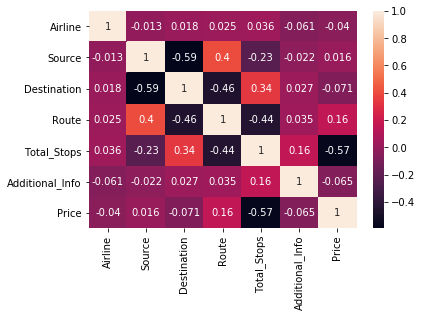

In [27]:
sns.heatmap(dfcor,annot=True)#source and route seem to be the most strongly positively related attributes. Destination and Total_stops also seem to be positively related as Price and Route

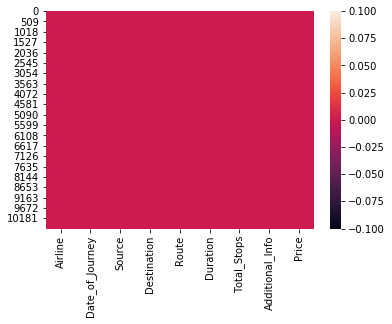

In [28]:
sns.heatmap(df.isnull())

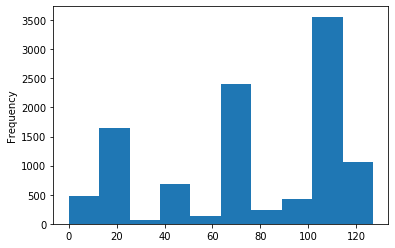

In [29]:
df['Route'].plot.hist()

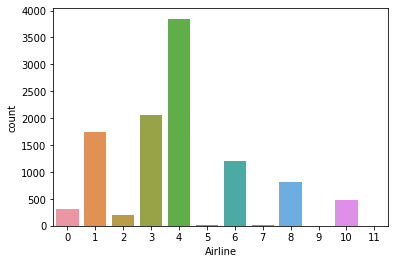

In [30]:
sns.countplot(df['Airline'])# a particular airline is preferred above others

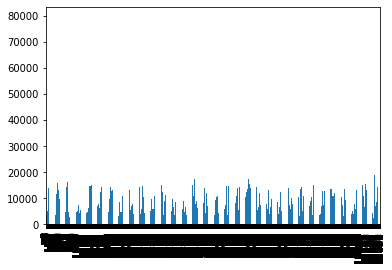

In [31]:
df['Price'].plot.bar()

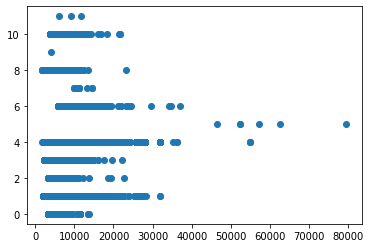

In [32]:
plt.scatter(df['Price'],df['Airline'])#insignificant relationship between Price and Airline

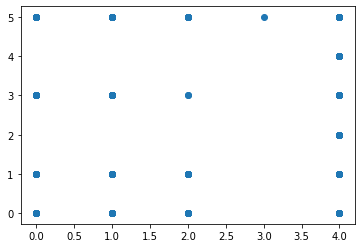

In [33]:
plt.scatter(df['Total_Stops'],df['Destination'])#insignificant relationship between total_stops and destination

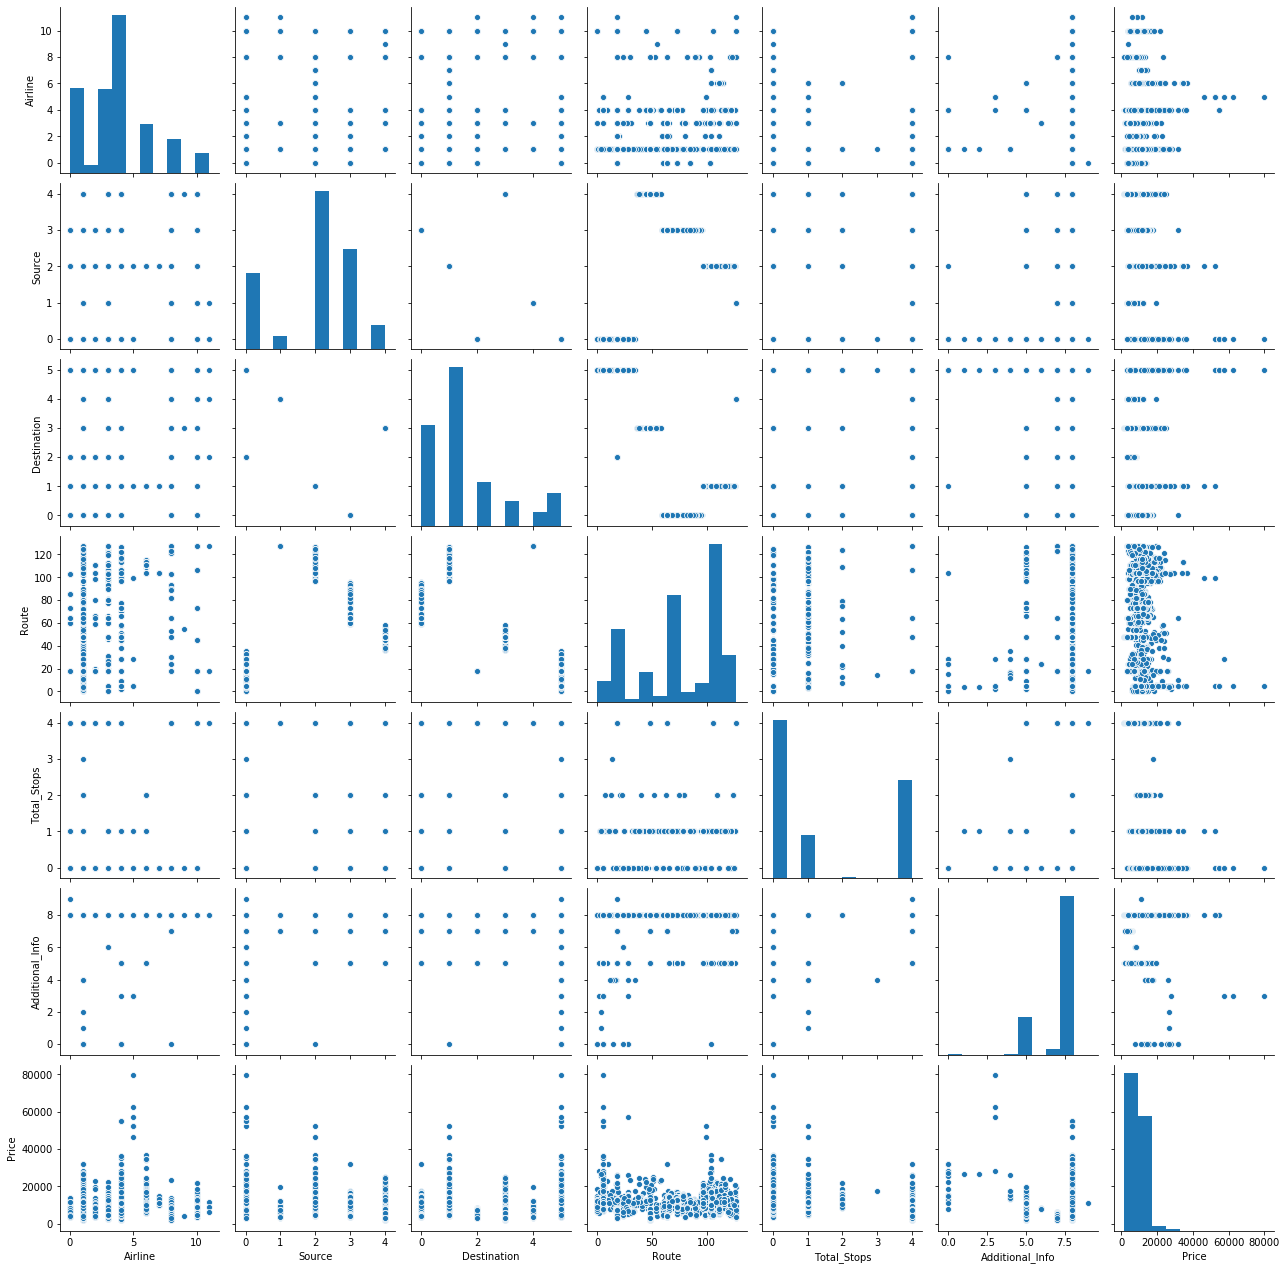

In [34]:
sns.pairplot(df)

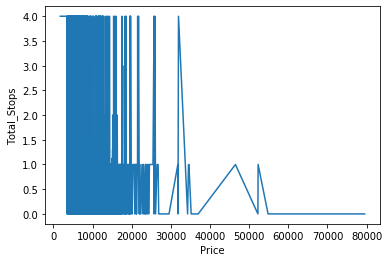

In [35]:
sns.lineplot(x='Price',y='Total_Stops',data=df)
plt.show()

In [36]:
collist=df.columns.values
ncol=7
nrows=2

In [38]:
def time_to_num(x):
    hh, mm , ss = map(int, df[x].split(':'))
    return ss + 60*(mm + 60*hh)

In [42]:
df['Duration']=df['Duration'].dt.total_seconds().astype('int')

In [45]:
df.dtypes

Airline                     int32
Date_of_Journey    datetime64[ns]
Source                      int32
Destination                 int32
Route                       int32
Duration                    int32
Total_Stops                 int32
Additional_Info             int32
Price                       int64
dtype: object

In [46]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [47]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(10682, 8)
(10512, 8)


In [49]:
df_new.skew()

Airline            0.729341
Source            -0.438281
Destination        1.264032
Route             -0.505646
Duration           0.778780
Total_Stops        0.613857
Additional_Info   -1.529090
Price              0.412947
dtype: float64

In [51]:
Destination_sqrt=np.sqrt(df_new['Destination'])
Destination_sqrt.skew()

0.020805669502474384

In [52]:
Duration_sqrt=np.sqrt(df_new['Duration'])
Duration_sqrt.skew()

0.3144005198968496

In [53]:
Total_Stops_sqrt=np.sqrt(df_new['Total_Stops'])
Total_Stops_sqrt.skew()

0.3899526328665946

In [54]:
#seperating my input and output variables
x=df_new.iloc[:,0:-1]
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,3,0,5,18,10200,4,8
1,1,3,0,84,26700,1,8
2,4,2,1,118,68400,1,8
3,3,3,0,91,19500,0,8
4,3,0,5,29,17100,0,8


In [55]:
y=pd.DataFrame(df_new['Price'])
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.24)

In [58]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    final_r_state = 0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
# calling the function 
maxr2_score(lm,x,y)

r2_score corresponding to random state;  42  is:  1.0
r2_score corresponding to random state;  43  is:  1.0
r2_score corresponding to random state;  44  is:  1.0
r2_score corresponding to random state;  45  is:  1.0
r2_score corresponding to random state;  46  is:  1.0
r2_score corresponding to random state;  47  is:  1.0
r2_score corresponding to random state;  48  is:  1.0
r2_score corresponding to random state;  49  is:  1.0
r2_score corresponding to random state;  50  is:  1.0
r2_score corresponding to random state;  51  is:  1.0
r2_score corresponding to random state;  52  is:  1.0
r2_score corresponding to random state;  53  is:  1.0
r2_score corresponding to random state;  54  is:  1.0
r2_score corresponding to random state;  55  is:  1.0
r2_score corresponding to random state;  56  is:  1.0
r2_score corresponding to random state;  57  is:  1.0
r2_score corresponding to random state;  58  is:  1.0
r2_score corresponding to random state;  59  is:  1.0
r2_score corresponding to ra

In [59]:
#final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20)
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [60]:
#using cross validation to check over/under fitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([1., 1., 1., 1., 1.])

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score: ',r2_score(y_test,y_pred))

RMSE is:  8.703004620408955e-12
r2_score:  1.0


In [62]:
#saving the model
from sklearn.externals import joblib
filename='flight_ticketfile.obj'

In [63]:
joblib.dump(lm,'flight_ticketfile.obj')

['flight_ticketfile.obj']